# Python Project: Analyzing Biodiversity Data

In this project, we will be analyzing data from the National Parks Service on biodiversity.

Importing pyplot, pandas, numpy, seaborn

In [45]:
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

import pandas as pd
import numpy as np
import seaborn as sns

from itertools import chain
import string

%matplotlib inline

Creating pandas dataframes

In [6]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
species = pd.read_csv('species_info.csv', encoding='utf-8')

In [7]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [8]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Distribution of Conservation Status for species that are of concern (nan values in 'conservation_status' means the species is not of concern)

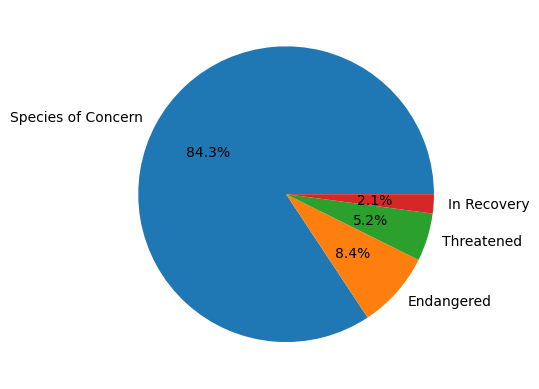

<Figure size 640x480 with 0 Axes>

In [9]:
plt.pie(species['conservation_status'].value_counts(),\
        labels = ['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'], autopct='%0.1f%%')
plt.show()
plt.clf()

Now that we've done this, we would like to get rid of the nan values in the conservation status column. So we'll fill those values with "No Concern."

In [10]:
species['conservation_status'].fillna('No Concern', inplace=True)

The next thing we will do is figure out if different types of species are more likely to be protected or not. We'll start by creating a column specifying whether a species is protected or not - this will be determined by whether their conservation status is "no concern" or not.

In [11]:
species['protected?'] = species.conservation_status != 'No Concern'

species

,category,scientific_name,common_names,conservation_status,protected?
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern,False
1,Mammal,Bos bison,"American Bison, Bison",No Concern,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Concern,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Concern,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Concern,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Concern,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Concern,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Concern,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Concern,False


Creating table that separates species by category and counts amount of protected vs unprotected species of that type, and also calculates the percentage of those types that are protected

In [12]:
protected_by_category = species.groupby(['category', 'protected?']).scientific_name.nunique().reset_index().pivot(
    
columns='protected?', index='category', values='scientific_name'
    
).reset_index()

protected_by_category.columns = ['category', 'unprotected', 'protected']

protected_by_category['percent_protected'] = protected_by_category.protected /   \
(protected_by_category.protected + protected_by_category.unprotected) * 100

protected_by_category

,category,unprotected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


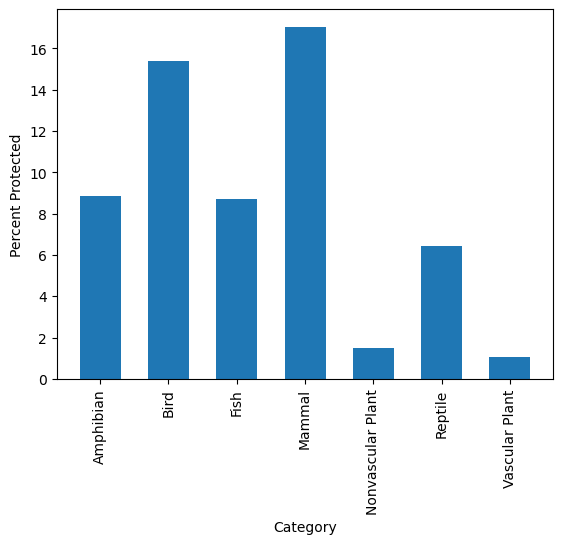

In [13]:
plt.bar(protected_by_category.category, protected_by_category.percent_protected, width=0.6)
plt.xlabel('Category')
plt.ylabel('Percent Protected')
plt.xticks(rotation='vertical')
plt.show()

So as we can see, mammals and birds are particularly likely to be protected, whereas plants are less likely than the rest.

The next thing we'll do is figure out what organism was spotted the most or least at each park.

In [14]:
print(observations['park_name'].unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


First we create 4 separate dataframes, one for each park.

In [15]:
observations_smoky = observations[observations['park_name'] == 'Great Smoky Mountains National Park']
observations_yosemite = observations[observations['park_name'] == 'Yosemite National Park']
observations_bryce = observations[observations['park_name'] == 'Bryce National Park']
observations_yellowstone = observations[observations['park_name'] == 'Yellowstone National Park']

Next we will reorder the rows of the above dataframes by number of observations, from least to most.

In [16]:
observations_smoky = observations_smoky.sort_values(by = 'observations')
observations_yosemite = observations_yosemite.sort_values(by = 'observations')
observations_bryce = observations_bryce.sort_values(by = 'observations')
observations_yellowstone = observations_yellowstone.sort_values(by = 'observations')

Finally, we will view the dataframes, which will show us the bottom and top ends - allowing us to see the lowest and highest observation counts.

In [17]:
observations_smoky

,scientific_name,park_name,observations
15511,Collomia tinctoria,Great Smoky Mountains National Park,10
16054,Strix occidentalis,Great Smoky Mountains National Park,11
18823,Rana sierrae,Great Smoky Mountains National Park,11
20375,Sambucus mexicana,Great Smoky Mountains National Park,12
15455,Seiurus aurocapilla,Great Smoky Mountains National Park,13
...,...,...,...
17366,Branta hutchinsii,Great Smoky Mountains National Park,139
11847,Festuca subulata,Great Smoky Mountains National Park,141
20231,Botrychium dissectum,Great Smoky Mountains National Park,144
11487,Lespedeza violacea,Great Smoky Mountains National Park,146


In [18]:
observations_yosemite

,scientific_name,park_name,observations
16618,Noturus baileyi,Yosemite National Park,31
3855,Canis rufus,Yosemite National Park,34
1294,Canis lupus,Yosemite National Park,35
20484,Chasmistes liorus,Yosemite National Park,35
9283,Glaucomys sabrinus coloratus,Yosemite National Park,36
...,...,...,...
16763,Castilleja pallescens,Yosemite National Park,214
1607,Trillium rugelii,Yosemite National Park,219
22161,Artemisia arbuscula ssp. arbuscula,Yosemite National Park,219
12527,Lipocarpha micrantha,Yosemite National Park,222


In [19]:
observations_bryce

,scientific_name,park_name,observations
9418,Corydalis aurea,Bryce National Park,9
3888,Arenaria serpyllifolia,Bryce National Park,19
6458,Vermivora bachmanii,Bryce National Park,20
16883,Ovis canadensis sierrae,Bryce National Park,22
6840,Noturus baileyi,Bryce National Park,22
...,...,...,...
4075,Draba oligosperma,Bryce National Park,167
11089,Martes americana,Bryce National Park,167
18228,Ericameria bloomeri,Bryce National Park,172
19536,Melilotus indica,Bryce National Park,173


In [20]:
observations_yellowstone

,scientific_name,park_name,observations
10848,Grus americana,Yellowstone National Park,57
17418,Vermivora bachmanii,Yellowstone National Park,58
10268,Canis lupus,Yellowstone National Park,60
15940,Canis rufus,Yellowstone National Park,60
11904,Rana sierrae,Yellowstone National Park,60
...,...,...,...
7112,Bidens tripartita,Yellowstone National Park,314
8749,Dracocephalum parviflorum,Yellowstone National Park,316
20734,Cryptantha fendleri,Yellowstone National Park,316
1168,Castilleja miniata,Yellowstone National Park,317


Using these data frames and some internet searches, we can create a list of the most and least-spotted animals at each park:
    
    Great Smoky Mountains:
        -Least Spotted: Staining Collomia [Plant] (10)
        -Most Spotted: Spiny Sowthistle [Plant] (147)
    Yosemite:
        -Least Spotted: Smoky Madtom [Fish] (31)
        -Most Spotted: Sky Mousetail [Plant] (223)
    Bryce:
        -Least Spotted: Yellow Corydalis [Plant] (9)
        -Most Spotted: Beaked Cornsalad [Plant] (176)
    Yellowstone:
        -Least Spotted: Whooping Crane [Bird] (57)
        -Most Spotted: Deeproot Club-Moss [Plant] (321)

The next thing we'll be doing is running a few chi-squared tests to see if the differences in conservation rates between certain species are statistically significant. We imported the necessary module up at the top, so we can go straight into using it here.

The first test we will run is between birds and fish. We will call it test1, and our entries will be the protected/non-protected counts from the two species groups.

In [29]:
test1 = [[75, 413], [11, 115]]
chi2_contingency(test1)

(3.1338596463736463,
 0.07668199569057187,
 1,
 array([[ 68.35179153, 419.64820847],
        [ 17.64820847, 108.35179153]]))

The p-value is the second value that is returned by the function. In this case, our p-value is 0.076, which is slightly above the standard significance threshold of 0.05 - which indicates that the difference in protection status between birds and fish may not be particularly significant.

Our second test will be between mammals and reptiles, and will be called test2. Similarly, we will enter the counts of protected and non-protected species from each group.

In [30]:
test2 = [[30, 146], [5, 73]]
chi2_contingency(test2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

In this case, our p-value is 0.038, which is under the threshold of 0.05 - this indicates that the difference in conservation status between mammals and reptiles is likely to be significant.

The final chi-squared test we will be running is between mammals and fish. This will be called test3, and once again we will be entering the counts of protected and non-protected from each group.

In [31]:
test3 = [[30, 146], [11, 115]]
chi2_contingency(test3)

(3.647651024981415,
 0.0561483484489001,
 1,
 array([[ 23.89403974, 152.10596026],
        [ 17.10596026, 108.89403974]]))

The p-value we received for this test is 0.056 - which is very close to the 0.05 threshold. This result is very close, but we should err on the side of caution and say that the difference in conservation status between mammals and fish is more likely to not be significant.

Next, we will be cleaning up the data on common species names for ease of viewing, as well as determining what types of animals have more varieties appearing at these parks than others.

The first thing we will do is create a 2-dimensional list called mammal_terms. This list contains all words that appear in the common names of the mammals in the species data frame. It's very important as well that we remove all punctuation, as some common name lists will contain the same term twice, but one having a comma and one not.

The below function will take all punctuation marks from the name and turn it into an empty string - we will then apply that function to every name in the common_names column of the species that are mammals.

In [57]:
def punct_remove(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

mammal_terms = species[species.category == 'Mammal'].common_names.apply(punct_remove).str.split().tolist()

We will then remove duplicate values from this list by converting the individual lists within mammal_terms into a dictionary with the words from each small list becoming the keys - this will only count each term once, ignoring duplicates. We then turn that dictionary back into a list, and add it to our new 2-dimensional list, no_duplicates.

In [58]:
no_duplicates = []

for term_set in mammal_terms:
    term_set = list(dict.fromkeys(term_set))
    no_duplicates.append(term_set)

Our next course of action is to turn the above mess into a single list for easier analysis. The below line of code creates an iterated chain of all the terms that appear in the no_duplicates list, by going through each individual list. It then transfers them, term by term, into a new list called individual_terms, thereby creating one single list of all the terms.

In [59]:
individual_terms = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in no_duplicates))

Finally, we will create a data frame that contains all the different terms that come up at least once in the individual_terms list, and lists them along with how many times they appear. The code below takes each term in individual terms, and creates a tuple object (essentially an ordered pair) that contains the term and the amount of times it appears. It then adds that object to a lsit called word_counts.

Finally, it creates a pandas dataframe of that list of pairs, allowing us to easily see what animals appear the most often.

In [62]:
word_counts = []

for i in individual_terms:
    x = individual_terms.count(i)
    word_counts.append((i,x))

pd.DataFrame(set(word_counts), columns =['Word', 'Count']).sort_values("Count", ascending = False)

,Word,Count
136,Bat,23
140,Shrew,18
147,Myotis,17
76,Mouse,16
69,Chipmunk,13
...,...,...
123,Antelope,1
122,Gappers,1
60,Lyell,1
120,Merriams,1


So as we can see, the most frequently occurring animals are bats and shrews - the last thing we will do is determine the distribution of bats and shrews throughout the different parks involved in the collection of the data.

To start, we will create new columns in the species dataframe that tell us whether an animal is a bat or a shrew, or not.

In [72]:
species['bat?'] = species.common_names.str.contains(r'\bBat\b', regex = True)
species['shrew?'] = species.common_names.str.contains(r'\bShrew\b', regex = True)

The above lines of code will create new columns that return False if the common name of an animal does not contain 'Bat' or 'Shrew' respectively, and True if it does.

In [73]:
species[species['bat?']]

,category,scientific_name,common_names,conservation_status,protected?,bat?,shrew?
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Concern,False,True,False
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True,False
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True,False
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Concern,False,True,False
32,Mammal,Lasiurus cinereus,Hoary Bat,No Concern,False,True,False
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True,False
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True,False
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True,False
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True,False
40,Mammal,Nycticeius humeralis,Evening Bat,No Concern,False,True,False


In [74]:
species[species['shrew?']]

,category,scientific_name,common_names,conservation_status,protected?,bat?,shrew?
79,Mammal,Blarina brevicauda,"Northern Short Tailed Shrew, Northern Short-Ta...",No Concern,False,False,True
80,Mammal,Cryptotis parva,Least Shrew,No Concern,False,False,True
81,Mammal,Sorex cinereus,"Common Shrew, Masked Shrew",No Concern,False,False,True
82,Mammal,Sorex dispar,"Long-Tailed Or Rock Shrew, Long-Tailed Shrew",No Concern,False,False,True
83,Mammal,Sorex fumeus,Smoky Shrew,No Concern,False,False,True
84,Mammal,Sorex hoyi,Pygmy Shrew,No Concern,False,False,True
85,Mammal,Sorex longirostris,Southeastern Shrew,No Concern,False,False,True
86,Mammal,Sorex palustris,Water Shrew,No Concern,False,False,True
3071,Mammal,Sorex cinereus,"Cinereus Shrew, Common Shrew, Masked Shrew",No Concern,False,False,True
3072,Mammal,Sorex hoyi,"American Pygmy Shrew, Pygmy Shrew",No Concern,False,False,True


Next, we will create two new dataframes, one containing all bat observations, and the other containing all shrew observations.

We will merge the observations dataframe with the 'bat?' column for one dataframe, and with 'shrew?' for the other. This will allow us to count up the observations of bats and shrews.

In [75]:
obs_bats = observations.merge(species[species['bat?']])
obs_shrews = observations.merge(species[species['shrew?']])

In [76]:
obs_bats

,scientific_name,park_name,observations,category,common_names,conservation_status,protected?,bat?,shrew?
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True,False
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True,False
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True,False
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True,False
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Concern,False,True,False
...,...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True,False
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True,False
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True,False
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True,False


In [77]:
obs_shrews

,scientific_name,park_name,observations,category,common_names,conservation_status,protected?,bat?,shrew?
0,Blarina brevicauda,Bryce National Park,77,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Concern,False,False,True
1,Blarina brevicauda,Great Smoky Mountains National Park,86,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Concern,False,False,True
2,Blarina brevicauda,Yellowstone National Park,244,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Concern,False,False,True
3,Blarina brevicauda,Yosemite National Park,185,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Concern,False,False,True
4,Sorex monticolus,Yellowstone National Park,252,Mammal,Dusky Shrew,No Concern,False,False,True
...,...,...,...,...,...,...,...,...,...
99,Sorex nanus,Yellowstone National Park,216,Mammal,"Dwarf Shrew, Rocky Mountain Dwarf Shrew",No Concern,False,False,True
100,Sorex preblei,Great Smoky Mountains National Park,59,Mammal,"Malheur Shrew, Preble's Shrew",Species of Concern,True,False,True
101,Sorex preblei,Bryce National Park,71,Mammal,"Malheur Shrew, Preble's Shrew",Species of Concern,True,False,True
102,Sorex preblei,Yosemite National Park,140,Mammal,"Malheur Shrew, Preble's Shrew",Species of Concern,True,False,True


Next we will group these two dataframes by park name, so we can figure out the distribution of bats and shrews between the four parks.

In [94]:
bats_by_park = obs_bats.groupby('park_name')
shrews_by_park = obs_shrews.groupby('park_name')

We will then add up the values for each park and create two new dataframes that have the total amount of observations for bats and shrews (respectively) in each park.

In [95]:
bats_by_park.observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [96]:
shrews_by_park.observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,2655
1,Great Smoky Mountains National Park,1808
2,Yellowstone National Park,6739
3,Yosemite National Park,3814


Our last goal is to plot these two animals by park and also by protected vs. non-protected. So we will now group by both park name and protected status.

In [103]:
bats_by_park_and_protection = obs_bats.groupby(['park_name', 'protected?'])
shrews_by_park_and_protection = obs_shrews.groupby(['park_name', 'protected?'])

We will then repeat the process from directly above, adding the bat and shrew observations for each park and protection status.

In [113]:
bat_df = bats_by_park_and_protection.observations.sum().reset_index()

bat_df

,park_name,protected?,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


In [114]:
shrew_df = shrews_by_park_and_protection.observations.sum().reset_index()

shrew_df

,park_name,protected?,observations
0,Bryce National Park,False,2584
1,Bryce National Park,True,71
2,Great Smoky Mountains National Park,False,1749
3,Great Smoky Mountains National Park,True,59
4,Yellowstone National Park,False,6546
5,Yellowstone National Park,True,193
6,Yosemite National Park,False,3674
7,Yosemite National Park,True,140


The last thing we will do is create side-by-side bar charts of bats and shrews, broken up by park, with each park having two bars - the blue bar representing unprotected animals, and the orange bar representing protected animals.

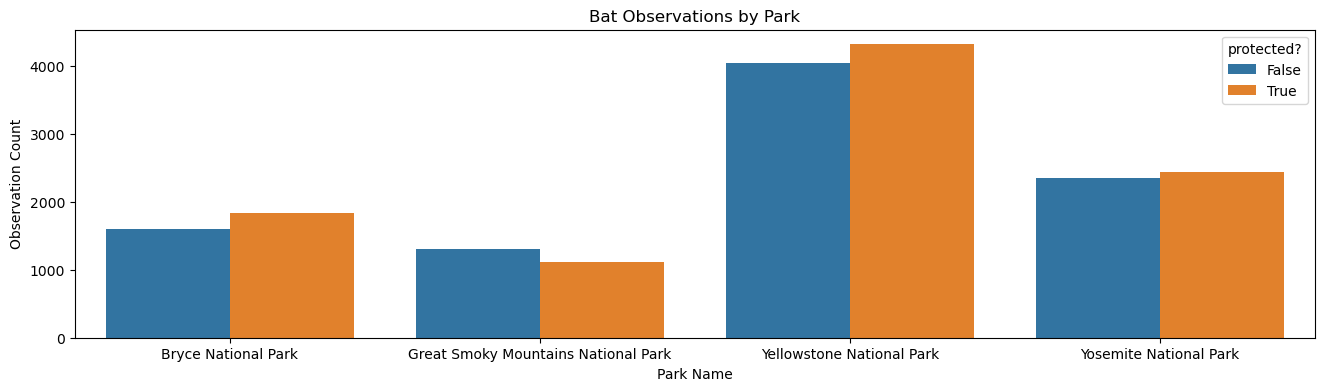

In [117]:
plt.figure(figsize=(16, 4))
sns.barplot(x = bat_df.park_name, y = bat_df.observations, hue = bat_df['protected?'])
plt.xlabel('Park Name')
plt.ylabel('Observation Count')
plt.title('Bat Observations by Park')
plt.show()

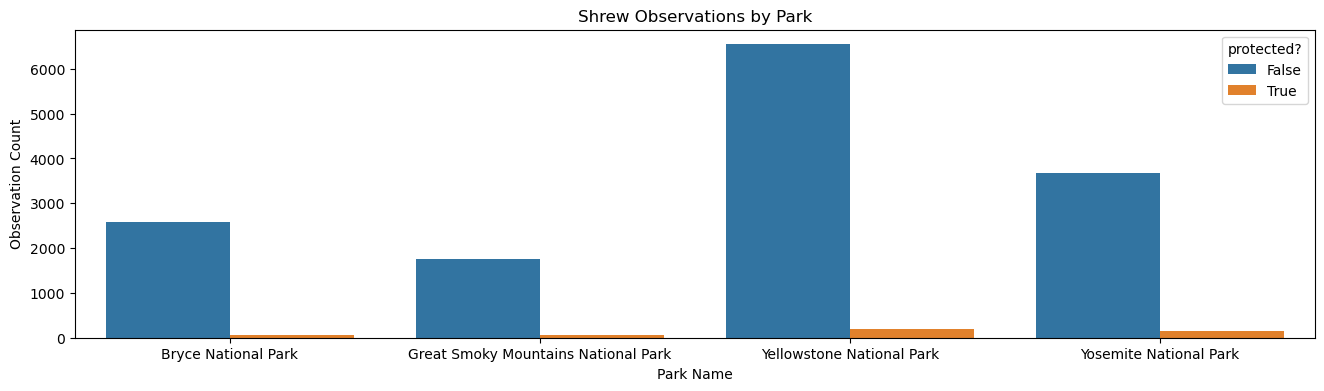

In [118]:
plt.figure(figsize=(16, 4))
sns.barplot(x = shrew_df.park_name, y = shrew_df.observations, hue = shrew_df['protected?'])
plt.xlabel('Park Name')
plt.ylabel('Observation Count')
plt.title('Shrew Observations by Park')
plt.show()

From this we can see that both bats and shrews are most spotted at Yellowstone. Bats are more even in their conservation status, with similar amounts for protected and unprotected. Shrews, however, are almost completely unprotected, with very few protected species spotted at any of the parks.